In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

In [4]:
rides_df =pd.read_csv('/content/cab_rides.csv')

In [3]:
weather_df =pd.read_csv('/content/weather.csv')

In [6]:
rides_df

distance cab_type     time_stamp    destination            source  \
0          0.44     Lyft  1544952607890  North Station  Haymarket Square   
1          0.44     Lyft  1543284023677  North Station  Haymarket Square   
2          0.44     Lyft  1543366822198  North Station  Haymarket Square   
3          0.44     Lyft  1543553582749  North Station  Haymarket Square   
4          0.44     Lyft  1543463360223  North Station  Haymarket Square   
...         ...      ...            ...            ...               ...   
24621      2.46     Uber  1543477978043    Beacon Hill            Fenway   
24622      2.46     Uber  1545143711880    Beacon Hill            Fenway   
24623      2.46     Uber  1543793277652    Beacon Hill            Fenway   
24624      2.46     Uber  1545067212429    Beacon Hill            Fenway   
24625      2.46     Uber  1543546082542    Beacon Hill            Fenway   

       price  surge_multiplier                                    id  \
0        5.0               1.0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7   
1       11.0               1.0  4bd23055-6827-41c6-b23b-3c491f24e74d   
2        7.0               1.0  981a3613-77af-4620-a42a-0c0866077d1e   
3       26.0               1.0  c2d88af2-d278-4bfd-a8d0-29ca77cc5512   
4        9.0               1.0  e0126e1f-8ca9-4f2e-82b3-50505a09db9a   
...      ...               ...                                   ...   
24621   33.5               1.0  442b63af-2b6c-445e-a242-89ae2432012c   
24622    NaN               1.0  6031d71e-f2bb-4d65-adb9-a3868c7aa588   
24623    8.5               1.0  62a141e6-c1e5-4c4a-9177-8365f2b89f76   
24624   11.0               1.0  8e92ef47-5e15-48ed-82c4-d019ecb55974   
24625   17.5               1.0      f956337c-6699-4cb8-84cf-ea441845   

                                 product_id          name  
0                                 lyft_line        Shared  
1                              lyft_premier           Lux  
2                                      lyft          Lyft  
3                               lyft_luxsuv  Lux Black XL  
4                                 lyft_plus       Lyft XL  
...                                     ...           ...  
24621  6d318bcc-22a3-4af6-bddd-b409bfce1546     Black SUV  
24622  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a          Taxi  
24623  997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool  
24624  9a0e7b09-b92b-4c41-9779-2ad22b4d779d           WAV  
24625                                   NaN           NaN  

[24626 rows x 10 columns]

from matplotlib import pyplot as plt
rides_df['distance'].plot(kind='hist', bins=20, title='distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rides_df['time_stamp'].plot(kind='hist', bins=20, title='time_stamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rides_df['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rides_df['surge_multiplier'].plot(kind='hist', bins=20, title='surge_multiplier')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
rides_df.groupby('cab_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rides_df.plot(kind='scatter', x='distance', y='time_stamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rides_df.plot(kind='scatter', x='time_stamp', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rides_df.plot(kind='scatter', x='price', y='surge_multiplier', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_stamp']
  ys = series['distance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rides_df.sort_values('time_stamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cab_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='cab_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('distance')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_stamp']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rides_df.sort_values('time_stamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cab_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='cab_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_stamp']
  ys = series['surge_multiplier']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rides_df.sort_values('time_stamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cab_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='cab_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('surge_multiplier')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time_stamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time_stamp'}, axis=1)
              .sort_values('time_stamp', ascending=True))
  xs = counted['time_stamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rides_df.sort_values('time_stamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cab_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='cab_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
rides_df['distance'].plot(kind='line', figsize=(8, 4), title='distance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rides_df['time_stamp'].plot(kind='line', figsize=(8, 4), title='time_stamp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rides_df['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rides_df['surge_multiplier'].plot(kind='line', figsize=(8, 4), title='surge_multiplier')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(rides_df['cab_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(rides_df, x='distance', y='cab_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(rides_df['cab_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(rides_df, x='time_stamp', y='cab_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(rides_df['cab_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(rides_df, x='price', y='cab_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(rides_df['cab_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(rides_df, x='surge_multiplier', y='cab_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

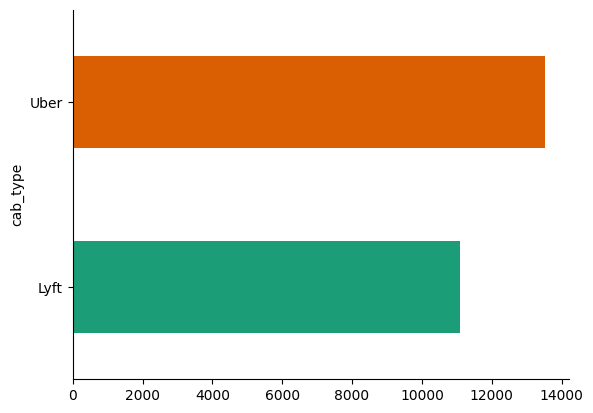

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
rides_df.groupby('cab_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

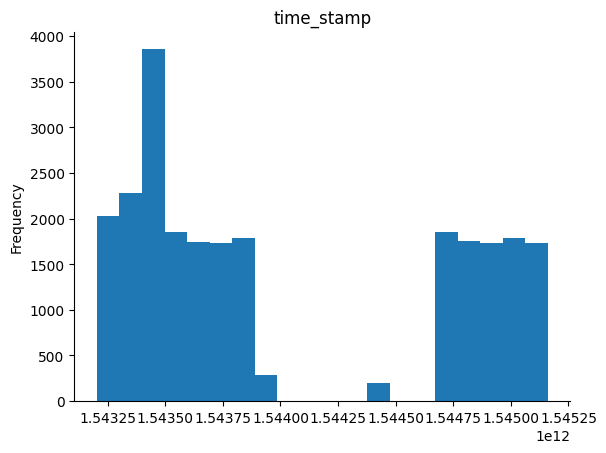

In [10]:
from matplotlib import pyplot as plt
rides_df['time_stamp'].plot(kind='hist', bins=20, title='time_stamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-9-62c0f839018a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(rides_df, x='surge_multiplier', y='cab_type', inner='box', palette='Dark2')


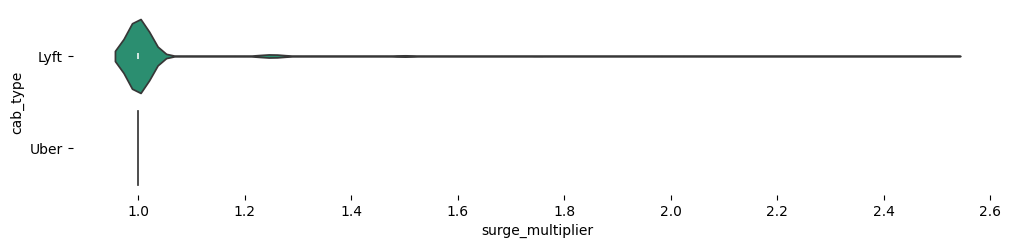

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(rides_df['cab_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(rides_df, x='surge_multiplier', y='cab_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [7]:
weather_df

temp                 location  clouds  pressure    rain  time_stamp  \
0     42.42                 Back Bay    1.00   1012.14  0.1228  1545003901   
1     42.43              Beacon Hill    1.00   1012.15  0.1846  1545003901   
2     42.50        Boston University    1.00   1012.15  0.1089  1545003901   
3     42.11                   Fenway    1.00   1012.13  0.0969  1545003901   
4     43.13       Financial District    1.00   1012.14  0.1786  1545003901   
...     ...                      ...     ...       ...     ...         ...   
6271  44.72            North Station    0.89   1000.69     NaN  1543819974   
6272  44.85  Northeastern University    0.88   1000.71     NaN  1543819974   
6273  44.82            South Station    0.89   1000.70     NaN  1543819974   
6274  44.78         Theatre District    0.89   1000.70     NaN  1543819974   
6275  44.69                 West End    0.89   1000.70     NaN  1543819974   

      humidity   wind  
0         0.77  11.25  
1         0.76  11.32  
2         0.76  11.07  
3         0.77  11.09  
4         0.75  11.49  
...        ...    ...  
6271      0.96   1.52  
6272      0.96   1.54  
6273      0.96   1.54  
6274      0.96   1.54  
6275      0.96   1.52  

[6276 rows x 8 columns]

from matplotlib import pyplot as plt
weather_df['temp'].plot(kind='hist', bins=20, title='temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather_df['clouds'].plot(kind='hist', bins=20, title='clouds')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather_df['pressure'].plot(kind='hist', bins=20, title='pressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather_df['rain'].plot(kind='hist', bins=20, title='rain')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather_df.plot(kind='scatter', x='temp', y='clouds', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather_df.plot(kind='scatter', x='clouds', y='pressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather_df.plot(kind='scatter', x='pressure', y='rain', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather_df.plot(kind='scatter', x='rain', y='time_stamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_stamp']
  ys = series['temp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = weather_df.sort_values('time_stamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('temp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_stamp']
  ys = series['clouds']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = weather_df.sort_values('time_stamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('clouds')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_stamp']
  ys = series['pressure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = weather_df.sort_values('time_stamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('pressure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_stamp']
  ys = series['rain']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = weather_df.sort_values('time_stamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('rain')

from matplotlib import pyplot as plt
weather_df['temp'].plot(kind='line', figsize=(8, 4), title='temp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
weather_df['clouds'].plot(kind='line', figsize=(8, 4), title='clouds')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
weather_df['pressure'].plot(kind='line', figsize=(8, 4), title='pressure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
weather_df['rain'].plot(kind='line', figsize=(8, 4), title='rain')
plt.gca().spines[['top', 'right']].set_visible(False)

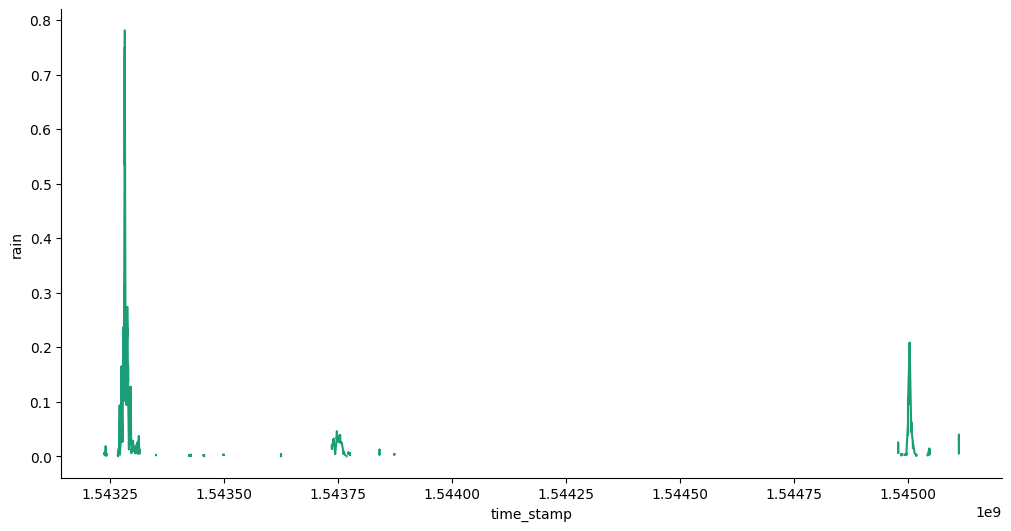

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_stamp']
  ys = series['rain']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = weather_df.sort_values('time_stamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('rain')

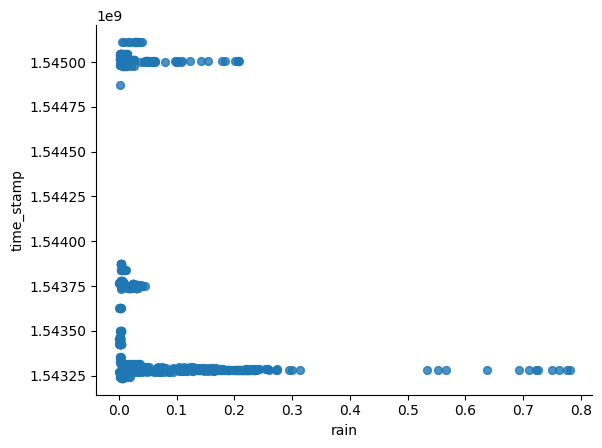

In [14]:
from matplotlib import pyplot as plt
weather_df.plot(kind='scatter', x='rain', y='time_stamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

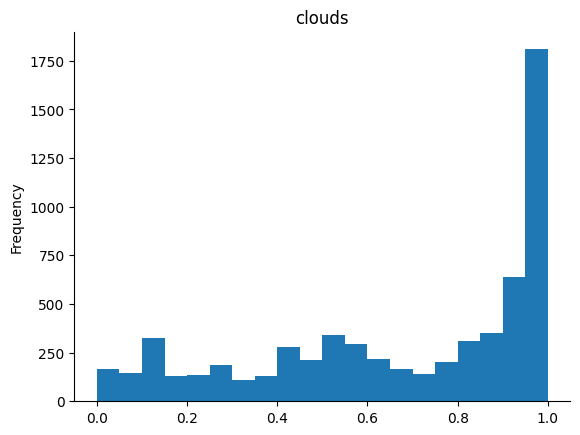

In [13]:
# @title clouds

from matplotlib import pyplot as plt
weather_df['clouds'].plot(kind='hist', bins=20, title='clouds')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24626 entries, 0 to 24625
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          24626 non-null  float64
 1   cab_type          24626 non-null  object 
 2   time_stamp        24626 non-null  int64  
 3   destination       24626 non-null  object 
 4   source            24626 non-null  object 
 5   price             22689 non-null  float64
 6   surge_multiplier  24626 non-null  float64
 7   id                24626 non-null  object 
 8   product_id        24625 non-null  object 
 9   name              24625 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.9+ MB


In [16]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [17]:
rides_df.isna().sum()

distance               0
cab_type               0
time_stamp             0
destination            0
source                 0
price               1937
surge_multiplier       0
id                     0
product_id             1
name                   1
dtype: int64

In [18]:
weather_df.isna().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [19]:
ride_df=rides_df.dropna(axis=0).reset_index(drop=False)
ride_df

index  distance cab_type     time_stamp    destination  \
0          0      0.44     Lyft  1544952607890  North Station   
1          1      0.44     Lyft  1543284023677  North Station   
2          2      0.44     Lyft  1543366822198  North Station   
3          3      0.44     Lyft  1543553582749  North Station   
4          4      0.44     Lyft  1543463360223  North Station   
...      ...       ...      ...            ...            ...   
22683  24619      2.46     Uber  1545039908713    Beacon Hill   
22684  24620      2.46     Uber  1543458908887    Beacon Hill   
22685  24621      2.46     Uber  1543477978043    Beacon Hill   
22686  24623      2.46     Uber  1543793277652    Beacon Hill   
22687  24624      2.46     Uber  1545067212429    Beacon Hill   

                 source  price  surge_multiplier  \
0      Haymarket Square    5.0               1.0   
1      Haymarket Square   11.0               1.0   
2      Haymarket Square    7.0               1.0   
3      Haymarket Square   26.0               1.0   
4      Haymarket Square    9.0               1.0   
...                 ...    ...               ...   
22683            Fenway   20.5               1.0   
22684            Fenway   11.0               1.0   
22685            Fenway   33.5               1.0   
22686            Fenway    8.5               1.0   
22687            Fenway   11.0               1.0   

                                         id  \
0      424553bb-7174-41ea-aeb4-fe06d4f4b9d7   
1      4bd23055-6827-41c6-b23b-3c491f24e74d   
2      981a3613-77af-4620-a42a-0c0866077d1e   
3      c2d88af2-d278-4bfd-a8d0-29ca77cc5512   
4      e0126e1f-8ca9-4f2e-82b3-50505a09db9a   
...                                     ...   
22683  10412d22-4e4e-4a7e-93b3-5d53adfdb5ec   
22684  144a1c54-257f-4ecd-b690-80c3c4ea3574   
22685  442b63af-2b6c-445e-a242-89ae2432012c   
22686  62a141e6-c1e5-4c4a-9177-8365f2b89f76   
22687  8e92ef47-5e15-48ed-82c4-d019ecb55974   

                                 product_id          name  
0                                 lyft_line        Shared  
1                              lyft_premier           Lux  
2                                      lyft          Lyft  
3                               lyft_luxsuv  Lux Black XL  
4                                 lyft_plus       Lyft XL  
...                                     ...           ...  
22683  6c84fd89-3f11-4782-9b50-97c468b19529         Black  
22684  55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX  
22685  6d318bcc-22a3-4af6-bddd-b409bfce1546     Black SUV  
22686  997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool  
22687  9a0e7b09-b92b-4c41-9779-2ad22b4d779d           WAV  

[22688 rows x 11 columns]

from matplotlib import pyplot as plt
ride_df['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ride_df['distance'].plot(kind='hist', bins=20, title='distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ride_df['time_stamp'].plot(kind='hist', bins=20, title='time_stamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ride_df['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
ride_df.groupby('cab_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ride_df.plot(kind='scatter', x='index', y='distance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ride_df.plot(kind='scatter', x='distance', y='time_stamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ride_df.plot(kind='scatter', x='time_stamp', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ride_df.plot(kind='scatter', x='price', y='surge_multiplier', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['distance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ride_df.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cab_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='cab_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('distance')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ride_df.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cab_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='cab_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['surge_multiplier']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ride_df.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cab_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='cab_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('surge_multiplier')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ride_df.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cab_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='cab_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
ride_df['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ride_df['distance'].plot(kind='line', figsize=(8, 4), title='distance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ride_df['time_stamp'].plot(kind='line', figsize=(8, 4), title='time_stamp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ride_df['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(ride_df['cab_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(ride_df, x='index', y='cab_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(ride_df['cab_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(ride_df, x='distance', y='cab_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(ride_df['cab_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(ride_df, x='time_stamp', y='cab_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(ride_df['cab_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(ride_df, x='price', y='cab_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

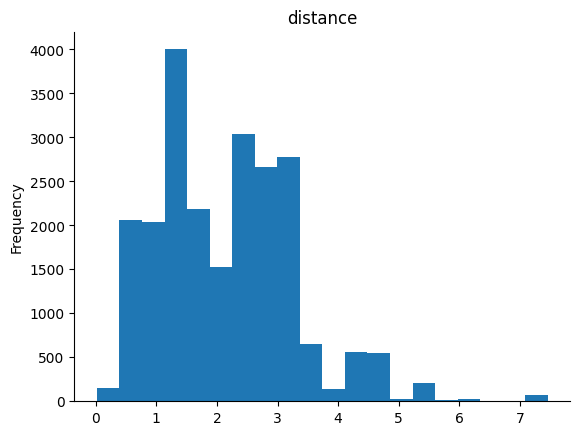

In [41]:
from matplotlib import pyplot as plt
ride_df['distance'].plot(kind='hist', bins=20, title='distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
weather_df=weather_df.fillna(0)
weather_df

temp                 location  clouds  pressure    rain  time_stamp  \
0     42.42                 Back Bay    1.00   1012.14  0.1228  1545003901   
1     42.43              Beacon Hill    1.00   1012.15  0.1846  1545003901   
2     42.50        Boston University    1.00   1012.15  0.1089  1545003901   
3     42.11                   Fenway    1.00   1012.13  0.0969  1545003901   
4     43.13       Financial District    1.00   1012.14  0.1786  1545003901   
...     ...                      ...     ...       ...     ...         ...   
6271  44.72            North Station    0.89   1000.69  0.0000  1543819974   
6272  44.85  Northeastern University    0.88   1000.71  0.0000  1543819974   
6273  44.82            South Station    0.89   1000.70  0.0000  1543819974   
6274  44.78         Theatre District    0.89   1000.70  0.0000  1543819974   
6275  44.69                 West End    0.89   1000.70  0.0000  1543819974   

      humidity   wind  
0         0.77  11.25  
1         0.76  11.32  
2         0.76  11.07  
3         0.77  11.09  
4         0.75  11.49  
...        ...    ...  
6271      0.96   1.52  
6272      0.96   1.54  
6273      0.96   1.54  
6274      0.96   1.54  
6275      0.96   1.52  

[6276 rows x 8 columns]

from matplotlib import pyplot as plt
weather_df['temp'].plot(kind='hist', bins=20, title='temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather_df['clouds'].plot(kind='hist', bins=20, title='clouds')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather_df['pressure'].plot(kind='hist', bins=20, title='pressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather_df['rain'].plot(kind='hist', bins=20, title='rain')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather_df.plot(kind='scatter', x='temp', y='clouds', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather_df.plot(kind='scatter', x='clouds', y='pressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather_df.plot(kind='scatter', x='pressure', y='rain', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather_df.plot(kind='scatter', x='rain', y='time_stamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_stamp']
  ys = series['temp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = weather_df.sort_values('time_stamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('temp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_stamp']
  ys = series['clouds']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = weather_df.sort_values('time_stamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('clouds')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_stamp']
  ys = series['pressure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = weather_df.sort_values('time_stamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('pressure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_stamp']
  ys = series['rain']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = weather_df.sort_values('time_stamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('rain')

from matplotlib import pyplot as plt
weather_df['temp'].plot(kind='line', figsize=(8, 4), title='temp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
weather_df['clouds'].plot(kind='line', figsize=(8, 4), title='clouds')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
weather_df['pressure'].plot(kind='line', figsize=(8, 4), title='pressure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
weather_df['rain'].plot(kind='line', figsize=(8, 4), title='rain')
plt.gca().spines[['top', 'right']].set_visible(False)

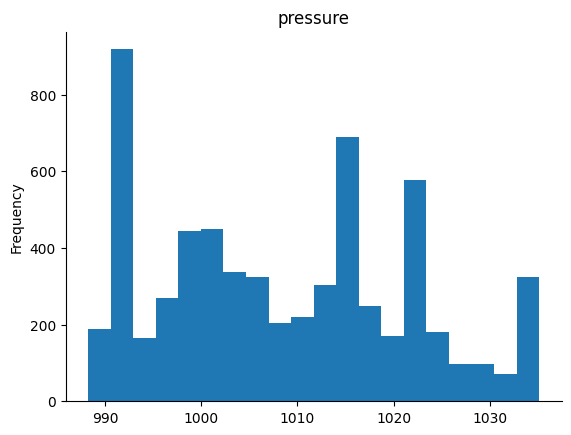

In [46]:
from matplotlib import pyplot as plt
weather_df['pressure'].plot(kind='hist', bins=20, title='pressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [44]:
locations=weather_df.groupby('location').mean()
locations

temp    clouds     pressure      rain  \
location                                                              
Back Bay                 39.082122  0.678432  1008.447820  0.007925   
Beacon Hill              39.047285  0.677801  1008.448356  0.008297   
Boston University        39.047744  0.679235  1008.459254  0.007738   
Fenway                   38.964379  0.679866  1008.453289  0.007343   
Financial District       39.410822  0.676730  1008.435793  0.008563   
Haymarket Square         39.067897  0.676711  1008.445239  0.008660   
North End                39.090841  0.676730  1008.441912  0.008644   
North Station            39.035315  0.676998  1008.442811  0.008649   
Northeastern University  38.975086  0.678317  1008.444168  0.007358   
South Station            39.394092  0.677495  1008.438031  0.008310   
Theatre District         38.986711  0.677763  1008.444742  0.008405   
West End                 38.983403  0.677247  1008.441090  0.008657   

                           time_stamp  humidity      wind  
location                                                   
Back Bay                 1.543857e+09  0.764073  6.778528  
Beacon Hill              1.543857e+09  0.765048  6.810325  
Boston University        1.543857e+09  0.763786  6.692180  
Fenway                   1.543857e+09  0.767266  6.711721  
Financial District       1.543857e+09  0.754837  6.860019  
Haymarket Square         1.543857e+09  0.764837  6.843193  
North End                1.543857e+09  0.764054  6.853117  
North Station            1.543857e+09  0.765545  6.835755  
Northeastern University  1.543857e+09  0.767648  6.749426  
South Station            1.543857e+09  0.755468  6.848948  
Theatre District         1.543857e+09  0.767992  6.834302  
West End                 1.543857e+09  0.767266  6.816233

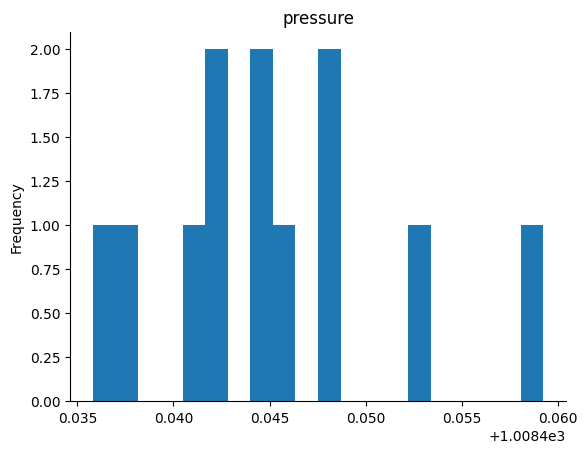

In [45]:
from matplotlib import pyplot as plt
locations['pressure'].plot(kind='hist', bins=20, title='pressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
avr_weather_df= weather_df.groupby('location').mean().reset_index(drop=False)
avr_weather_df

location       temp    clouds     pressure      rain  \
0                  Back Bay  39.082122  0.678432  1008.447820  0.007925   
1               Beacon Hill  39.047285  0.677801  1008.448356  0.008297   
2         Boston University  39.047744  0.679235  1008.459254  0.007738   
3                    Fenway  38.964379  0.679866  1008.453289  0.007343   
4        Financial District  39.410822  0.676730  1008.435793  0.008563   
5          Haymarket Square  39.067897  0.676711  1008.445239  0.008660   
6                 North End  39.090841  0.676730  1008.441912  0.008644   
7             North Station  39.035315  0.676998  1008.442811  0.008649   
8   Northeastern University  38.975086  0.678317  1008.444168  0.007358   
9             South Station  39.394092  0.677495  1008.438031  0.008310   
10         Theatre District  38.986711  0.677763  1008.444742  0.008405   
11                 West End  38.983403  0.677247  1008.441090  0.008657   

      time_stamp  humidity      wind  
0   1.543857e+09  0.764073  6.778528  
1   1.543857e+09  0.765048  6.810325  
2   1.543857e+09  0.763786  6.692180  
3   1.543857e+09  0.767266  6.711721  
4   1.543857e+09  0.754837  6.860019  
5   1.543857e+09  0.764837  6.843193  
6   1.543857e+09  0.764054  6.853117  
7   1.543857e+09  0.765545  6.835755  
8   1.543857e+09  0.767648  6.749426  
9   1.543857e+09  0.755468  6.848948  
10  1.543857e+09  0.767992  6.834302  
11  1.543857e+09  0.767266  6.816233

from matplotlib import pyplot as plt
_df_16['temp'].plot(kind='hist', bins=20, title='temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['clouds'].plot(kind='hist', bins=20, title='clouds')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['pressure'].plot(kind='hist', bins=20, title='pressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['rain'].plot(kind='hist', bins=20, title='rain')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='temp', y='clouds', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='clouds', y='pressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='pressure', y='rain', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='rain', y='time_stamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_stamp']
  ys = series['temp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('time_stamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('temp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_stamp']
  ys = series['clouds']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('time_stamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('clouds')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_stamp']
  ys = series['pressure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('time_stamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('pressure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_stamp']
  ys = series['rain']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('time_stamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('rain')

from matplotlib import pyplot as plt
_df_28['temp'].plot(kind='line', figsize=(8, 4), title='temp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['clouds'].plot(kind='line', figsize=(8, 4), title='clouds')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['pressure'].plot(kind='line', figsize=(8, 4), title='pressure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['rain'].plot(kind='line', figsize=(8, 4), title='rain')
plt.gca().spines[['top', 'right']].set_visible(False)

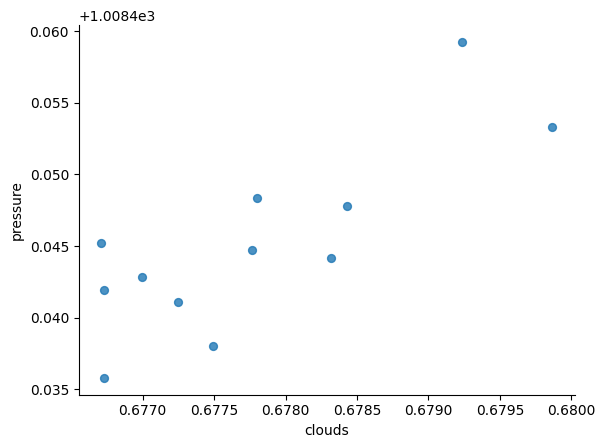

In [47]:
from matplotlib import pyplot as plt
avr_weather_df.plot(kind='scatter', x='clouds', y='pressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [24]:
avr_weather_df = avr_weather_df.drop('time_stamp', axis=1)
avr_weather_df

location       temp    clouds     pressure      rain  \
0                  Back Bay  39.082122  0.678432  1008.447820  0.007925   
1               Beacon Hill  39.047285  0.677801  1008.448356  0.008297   
2         Boston University  39.047744  0.679235  1008.459254  0.007738   
3                    Fenway  38.964379  0.679866  1008.453289  0.007343   
4        Financial District  39.410822  0.676730  1008.435793  0.008563   
5          Haymarket Square  39.067897  0.676711  1008.445239  0.008660   
6                 North End  39.090841  0.676730  1008.441912  0.008644   
7             North Station  39.035315  0.676998  1008.442811  0.008649   
8   Northeastern University  38.975086  0.678317  1008.444168  0.007358   
9             South Station  39.394092  0.677495  1008.438031  0.008310   
10         Theatre District  38.986711  0.677763  1008.444742  0.008405   
11                 West End  38.983403  0.677247  1008.441090  0.008657   

    humidity      wind  
0   0.764073  6.778528  
1   0.765048  6.810325  
2   0.763786  6.692180  
3   0.767266  6.711721  
4   0.754837  6.860019  
5   0.764837  6.843193  
6   0.764054  6.853117  
7   0.765545  6.835755  
8   0.767648  6.749426  
9   0.755468  6.848948  
10  0.767992  6.834302  
11  0.767266  6.816233

In [25]:
rides_df

distance cab_type     time_stamp    destination            source  \
0          0.44     Lyft  1544952607890  North Station  Haymarket Square   
1          0.44     Lyft  1543284023677  North Station  Haymarket Square   
2          0.44     Lyft  1543366822198  North Station  Haymarket Square   
3          0.44     Lyft  1543553582749  North Station  Haymarket Square   
4          0.44     Lyft  1543463360223  North Station  Haymarket Square   
...         ...      ...            ...            ...               ...   
24621      2.46     Uber  1543477978043    Beacon Hill            Fenway   
24622      2.46     Uber  1545143711880    Beacon Hill            Fenway   
24623      2.46     Uber  1543793277652    Beacon Hill            Fenway   
24624      2.46     Uber  1545067212429    Beacon Hill            Fenway   
24625      2.46     Uber  1543546082542    Beacon Hill            Fenway   

       price  surge_multiplier                                    id  \
0        5.0               1.0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7   
1       11.0               1.0  4bd23055-6827-41c6-b23b-3c491f24e74d   
2        7.0               1.0  981a3613-77af-4620-a42a-0c0866077d1e   
3       26.0               1.0  c2d88af2-d278-4bfd-a8d0-29ca77cc5512   
4        9.0               1.0  e0126e1f-8ca9-4f2e-82b3-50505a09db9a   
...      ...               ...                                   ...   
24621   33.5               1.0  442b63af-2b6c-445e-a242-89ae2432012c   
24622    NaN               1.0  6031d71e-f2bb-4d65-adb9-a3868c7aa588   
24623    8.5               1.0  62a141e6-c1e5-4c4a-9177-8365f2b89f76   
24624   11.0               1.0  8e92ef47-5e15-48ed-82c4-d019ecb55974   
24625   17.5               1.0      f956337c-6699-4cb8-84cf-ea441845   

                                 product_id          name  
0                                 lyft_line        Shared  
1                              lyft_premier           Lux  
2                                      lyft          Lyft  
3                               lyft_luxsuv  Lux Black XL  
4                                 lyft_plus       Lyft XL  
...                                     ...           ...  
24621  6d318bcc-22a3-4af6-bddd-b409bfce1546     Black SUV  
24622  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a          Taxi  
24623  997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool  
24624  9a0e7b09-b92b-4c41-9779-2ad22b4d779d           WAV  
24625                                   NaN           NaN  

[24626 rows x 10 columns]

from matplotlib import pyplot as plt
rides_df['distance'].plot(kind='hist', bins=20, title='distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rides_df['time_stamp'].plot(kind='hist', bins=20, title='time_stamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rides_df['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rides_df['surge_multiplier'].plot(kind='hist', bins=20, title='surge_multiplier')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
rides_df.groupby('cab_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rides_df.plot(kind='scatter', x='distance', y='time_stamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rides_df.plot(kind='scatter', x='time_stamp', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rides_df.plot(kind='scatter', x='price', y='surge_multiplier', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_stamp']
  ys = series['distance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rides_df.sort_values('time_stamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cab_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='cab_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('distance')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_stamp']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rides_df.sort_values('time_stamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cab_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='cab_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_stamp']
  ys = series['surge_multiplier']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rides_df.sort_values('time_stamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cab_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='cab_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('surge_multiplier')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time_stamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time_stamp'}, axis=1)
              .sort_values('time_stamp', ascending=True))
  xs = counted['time_stamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rides_df.sort_values('time_stamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cab_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='cab_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_stamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
rides_df['distance'].plot(kind='line', figsize=(8, 4), title='distance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rides_df['time_stamp'].plot(kind='line', figsize=(8, 4), title='time_stamp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rides_df['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rides_df['surge_multiplier'].plot(kind='line', figsize=(8, 4), title='surge_multiplier')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(rides_df['cab_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(rides_df, x='distance', y='cab_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(rides_df['cab_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(rides_df, x='time_stamp', y='cab_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(rides_df['cab_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(rides_df, x='price', y='cab_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(rides_df['cab_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(rides_df, x='surge_multiplier', y='cab_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [26]:
source_weather_df= avr_weather_df.rename(
columns={
    'location':'source',
    'temp':'source_temp',
    'clouds': 'source_clouds',
    'pressure':'source_pressure',
    'rain': 'source_rain',
    'humidity':'source_humidity',
    'wind':'source_wind'
}
)
source_weather_df

source  source_temp  source_clouds  source_pressure  \
0                  Back Bay    39.082122       0.678432      1008.447820   
1               Beacon Hill    39.047285       0.677801      1008.448356   
2         Boston University    39.047744       0.679235      1008.459254   
3                    Fenway    38.964379       0.679866      1008.453289   
4        Financial District    39.410822       0.676730      1008.435793   
5          Haymarket Square    39.067897       0.676711      1008.445239   
6                 North End    39.090841       0.676730      1008.441912   
7             North Station    39.035315       0.676998      1008.442811   
8   Northeastern University    38.975086       0.678317      1008.444168   
9             South Station    39.394092       0.677495      1008.438031   
10         Theatre District    38.986711       0.677763      1008.444742   
11                 West End    38.983403       0.677247      1008.441090   

    source_rain  source_humidity  source_wind  
0      0.007925         0.764073     6.778528  
1      0.008297         0.765048     6.810325  
2      0.007738         0.763786     6.692180  
3      0.007343         0.767266     6.711721  
4      0.008563         0.754837     6.860019  
5      0.008660         0.764837     6.843193  
6      0.008644         0.764054     6.853117  
7      0.008649         0.765545     6.835755  
8      0.007358         0.767648     6.749426  
9      0.008310         0.755468     6.848948  
10     0.008405         0.767992     6.834302  
11     0.008657         0.767266     6.816233

In [27]:
destination_weather_df= avr_weather_df.rename(
columns={
    'location':'destination',
    'temp':'destination_temp',
    'clouds': 'destination_clouds',
    'pressure':'destination_pressure',
    'rain': 'destination_rain',
    'humidity':'destination_humidity',
    'wind':'destination_wind'
}
)
destination_weather_df

destination  destination_temp  destination_clouds  \
0                  Back Bay         39.082122            0.678432   
1               Beacon Hill         39.047285            0.677801   
2         Boston University         39.047744            0.679235   
3                    Fenway         38.964379            0.679866   
4        Financial District         39.410822            0.676730   
5          Haymarket Square         39.067897            0.676711   
6                 North End         39.090841            0.676730   
7             North Station         39.035315            0.676998   
8   Northeastern University         38.975086            0.678317   
9             South Station         39.394092            0.677495   
10         Theatre District         38.986711            0.677763   
11                 West End         38.983403            0.677247   

    destination_pressure  destination_rain  destination_humidity  \
0            1008.447820          0.007925              0.764073   
1            1008.448356          0.008297              0.765048   
2            1008.459254          0.007738              0.763786   
3            1008.453289          0.007343              0.767266   
4            1008.435793          0.008563              0.754837   
5            1008.445239          0.008660              0.764837   
6            1008.441912          0.008644              0.764054   
7            1008.442811          0.008649              0.765545   
8            1008.444168          0.007358              0.767648   
9            1008.438031          0.008310              0.755468   
10           1008.444742          0.008405              0.767992   
11           1008.441090          0.008657              0.767266   

    destination_wind  
0           6.778528  
1           6.810325  
2           6.692180  
3           6.711721  
4           6.860019  
5           6.843193  
6           6.853117  
7           6.835755  
8           6.749426  
9           6.848948  
10          6.834302  
11          6.816233

In [28]:
rides_df.merge(source_weather_df,on='source')

distance cab_type     time_stamp    destination  \
0          0.44     Lyft  1544952607890  North Station   
1          0.44     Lyft  1543284023677  North Station   
2          0.44     Lyft  1543366822198  North Station   
3          0.44     Lyft  1543553582749  North Station   
4          0.44     Lyft  1543463360223  North Station   
...         ...      ...            ...            ...   
24621      1.34     Uber  1545086111941       Back Bay   
24622      1.34     Uber  1543309404089       Back Bay   
24623      1.34     Uber  1545016506672       Back Bay   
24624      1.34     Uber  1543311563280       Back Bay   
24625      1.34     Uber  1543578783009       Back Bay   

                        source  price  surge_multiplier  \
0             Haymarket Square    5.0               1.0   
1             Haymarket Square   11.0               1.0   
2             Haymarket Square    7.0               1.0   
3             Haymarket Square   26.0               1.0   
4             Haymarket Square    9.0               1.0   
...                        ...    ...               ...   
24621  Northeastern University    8.0               1.0   
24622  Northeastern University   14.0               1.0   
24623  Northeastern University    8.0               1.0   
24624  Northeastern University    8.0               1.0   
24625  Northeastern University    NaN               1.0   

                                         id  \
0      424553bb-7174-41ea-aeb4-fe06d4f4b9d7   
1      4bd23055-6827-41c6-b23b-3c491f24e74d   
2      981a3613-77af-4620-a42a-0c0866077d1e   
3      c2d88af2-d278-4bfd-a8d0-29ca77cc5512   
4      e0126e1f-8ca9-4f2e-82b3-50505a09db9a   
...                                     ...   
24621  56fca848-e9af-4907-8ce6-c869eab3d2c4   
24622  6b480415-c6ea-4fea-8eea-920dcc381637   
24623  7f519fa5-c44e-48a3-b55d-578befe3832b   
24624  92c2000b-8064-4c68-8f3e-c9bf49a99583   
24625  e4c86dcd-bf75-4e83-a418-a2da1ea4989d   

                                 product_id          name  source_temp  \
0                                 lyft_line        Shared    39.067897   
1                              lyft_premier           Lux    39.067897   
2                                      lyft          Lyft    39.067897   
3                               lyft_luxsuv  Lux Black XL    39.067897   
4                                 lyft_plus       Lyft XL    39.067897   
...                                     ...           ...          ...   
24621  997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool    38.975086   
24622  6c84fd89-3f11-4782-9b50-97c468b19529         Black    38.975086   
24623  55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX    38.975086   
24624  9a0e7b09-b92b-4c41-9779-2ad22b4d779d           WAV    38.975086   
24625  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a          Taxi    38.975086   

       source_clouds  source_pressure  source_rain  source_humidity  \
0           0.676711      1008.445239     0.008660         0.764837   
1           0.676711      1008.445239     0.008660         0.764837   
2           0.676711      1008.445239     0.008660         0.764837   
3           0.676711      1008.445239     0.008660         0.764837   
4           0.676711      1008.445239     0.008660         0.764837   
...              ...              ...          ...              ...   
24621       0.678317      1008.444168     0.007358         0.767648   
24622       0.678317      1008.444168     0.007358         0.767648   
24623       0.678317      1008.444168     0.007358         0.767648   
24624       0.678317      1008.444168     0.007358         0.767648   
24625       0.678317      1008.444168     0.007358         0.767648   

       source_wind  
0         6.843193  
1         6.843193  
2         6.843193  
3         6.843193  
4         6.843193  
...            ...  
24621     6.749426  
24622     6.749426  
24623     6.749426  
24624     6.749426  
24625     6.749426  

[24626 rows x 16 columns]

In [29]:
data = rides_df\
    .merge(source_weather_df, on ='source')\
    .merge(destination_weather_df, on='destination')

data

distance cab_type     time_stamp       destination              source  \
0          0.44     Lyft  1544952607890     North Station    Haymarket Square   
1          0.44     Lyft  1543284023677     North Station    Haymarket Square   
2          0.44     Lyft  1543366822198     North Station    Haymarket Square   
3          0.44     Lyft  1543553582749     North Station    Haymarket Square   
4          0.44     Lyft  1543463360223     North Station    Haymarket Square   
...         ...      ...            ...               ...                 ...   
24621      1.25     Lyft  1544775904875  Haymarket Square  Financial District   
24622      1.25     Lyft  1543654683793  Haymarket Square  Financial District   
24623      1.25     Lyft  1544850009458  Haymarket Square  Financial District   
24624      1.25     Lyft  1544973307699  Haymarket Square  Financial District   
24625      1.25     Uber  1543750383252  Haymarket Square  Financial District   

       price  surge_multiplier                                    id  \
0        5.0               1.0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7   
1       11.0               1.0  4bd23055-6827-41c6-b23b-3c491f24e74d   
2        7.0               1.0  981a3613-77af-4620-a42a-0c0866077d1e   
3       26.0               1.0  c2d88af2-d278-4bfd-a8d0-29ca77cc5512   
4        9.0               1.0  e0126e1f-8ca9-4f2e-82b3-50505a09db9a   
...      ...               ...                                   ...   
24621    5.0               1.0  7d30b957-45f6-4788-8215-605376c175d7   
24622   13.5               1.0  9f78fbec-794f-4167-ac02-bf8bf6005722   
24623   16.5               1.0  ae640396-488f-42d7-9459-12227bb567df   
24624    7.0               1.0  f0d8a171-7b51-436e-b5e7-14244946c551   
24625    7.0               1.0  98e156cf-8e76-4cb2-9e45-8bfdbd360383   

                                 product_id          name  ...  \
0                                 lyft_line        Shared  ...   
1                              lyft_premier           Lux  ...   
2                                      lyft          Lyft  ...   
3                               lyft_luxsuv  Lux Black XL  ...   
4                                 lyft_plus       Lyft XL  ...   
...                                     ...           ...  ...   
24621                             lyft_line        Shared  ...   
24622                          lyft_premier           Lux  ...   
24623                              lyft_lux     Lux Black  ...   
24624                                  lyft          Lyft  ...   
24625  55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX  ...   

       source_pressure  source_rain  source_humidity  source_wind  \
0          1008.445239     0.008660         0.764837     6.843193   
1          1008.445239     0.008660         0.764837     6.843193   
2          1008.445239     0.008660         0.764837     6.843193   
3          1008.445239     0.008660         0.764837     6.843193   
4          1008.445239     0.008660         0.764837     6.843193   
...                ...          ...              ...          ...   
24621      1008.435793     0.008563         0.754837     6.860019   
24622      1008.435793     0.008563         0.754837     6.860019   
24623      1008.435793     0.008563         0.754837     6.860019   
24624      1008.435793     0.008563         0.754837     6.860019   
24625      1008.435793     0.008563         0.754837     6.860019   

       destination_temp  destination_clouds  destination_pressure  \
0             39.035315            0.676998           1008.442811   
1             39.035315            0.676998           1008.442811   
2             39.035315            0.676998           1008.442811   
3             39.035315            0.676998           1008.442811   
4             39.035315            0.676998           1008.442811   
...                 ...                 ...                   ...   
24621         39.067897            0.676711           1008.44523

In [30]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [31]:
def preprocess_inputs(df):
    df = df.copy()
    # Drop id column
    df = df.drop('id', axis=1)
    # Binary encode cab_type column
    df['cab_type'] = df['cab_type'].replace({'Lyft': 0, 'Uber': 1})
    # One-hot encode remaining categorical columns
    for column, prefix in [('destination', "dest"), ('source', "src"), ('product_id', "pid"), ('name', "nm")]:
        df = onehot_encode(df, column=column, prefix=prefix)
    # Split df into X and y
    y = df['price']
    y.fillna(0)
    X = df.drop('price', axis=1)
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    return X_train, X_test, y_train, y_test

In [32]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [33]:
X_train.isna().sum()

distance            0
cab_type            0
time_stamp          0
surge_multiplier    0
source_temp         0
                   ..
nm_Taxi             0
nm_UberPool         0
nm_UberX            0
nm_UberXL           0
nm_WAV              0
Length: 66, dtype: int64

In [34]:
y_train

10894    38.0
1437      8.5
1566     27.5
18353    13.5
22603     9.5
         ... 
10955    34.0
17289    21.5
5192      NaN
12172     7.0
235      15.5
Name: price, Length: 17238, dtype: float64

In [35]:
X_test

distance  cab_type  time_stamp  surge_multiplier  source_temp  \
0    -0.837200  0.901559    0.956624         -0.155779    -0.035138   
1     1.916095 -1.109190   -0.650003         -0.155779    -0.698968   
2    -0.998107  0.901559    1.317683         -0.155779     0.025525   
3    -0.577961  0.901559   -1.043814         -0.155779    -0.274330   
4     0.208694 -1.109190    0.943981         -0.155779    -0.277522   
...        ...       ...         ...               ...          ...   
7383  2.729568 -1.109190   -0.561475         -0.155779     2.251817   
7384 -1.489766  0.901559   -0.697528         -0.155779    -0.134114   
7385  0.101423 -1.109190   -1.104883         -0.155779    -0.277522   
7386  0.789747 -1.109190    1.598932         -0.155779    -0.035138   
7387  0.405358  0.901559   -0.869937         -0.155779    -0.779852   

      source_clouds  source_pressure  source_rain  source_humidity  \
0          0.663453         0.435312    -0.612900        -0.004569   
1         -0.013523        -0.073420     0.387432         0.937884   
2         -1.058001        -0.541074     0.887000        -0.009167   
3          1.475824         2.324886    -1.003935        -0.073529   
4          0.025161         0.523787     0.163186         0.229895   
...             ...              ...          ...              ...   
7383      -1.058001        -1.552218     0.719014        -2.225082   
7384      -1.077343         0.008735     0.920118         0.179324   
7385       0.025161         0.523787     0.163186         0.229895   
7386       0.663453         0.435312    -0.612900        -0.004569   
7387       0.547400        -0.168215    -1.797578         0.855132   

      source_wind  ...  nm_Lux Black  nm_Lux Black XL   nm_Lyft  nm_Lyft XL  \
0       -0.458318  ...     -0.284408        -0.287021 -0.286547   -0.281778   
1        0.571450  ...     -0.284408         3.484067 -0.286547   -0.281778   
2        0.918825  ...     -0.284408        -0.287021 -0.286547   -0.281778   
3       -2.052571  ...     -0.284408        -0.287021 -0.286547   -0.281778   
4        0.128759  ...     -0.284408        -0.287021 -0.286547   -0.281778   
...           ...  ...           ...              ...       ...         ...   
7383     1.046266  ...      3.516076        -0.287021 -0.286547   -0.281778   
7384     0.735606  ...     -0.284408        -0.287021 -0.286547   -0.281778   
7385     0.128759  ...      3.516076        -0.287021 -0.286547   -0.281778   
7386    -0.458318  ...     -0.284408        -0.287021 -0.286547   -0.281778   
7387    -0.995619  ...     -0.284408        -0.287021 -0.286547   -0.281778   

      nm_Shared   nm_Taxi  nm_UberPool  nm_UberX  nm_UberXL    nm_WAV  
0     -0.282856 -0.295112    -0.293832  3.461275  -0.293949 -0.289735  
1     -0.282856 -0.295112    -0.293832 -0.288911  -0.293949 -0.289735  
2     -0.282856 -0.295112    -0.293832 -0.288911   3.401956 -0.289735  
3     -0.282856 -0.295112    -0.293832 -0.288911  -0.293949 -0.289735  
4     -0.282856 -0.295112    -0.293832 -0.288911  -0.293949 -0.289735  
...         ...       ...          ...       ...        ...       ...  
7383  -0.282856 -0.295112    -0.293832 -0.288911  -0.293949 -0.289735  
7384  -0.282856 -0.295112    -0.293832 -0.288911   3.401956 -0.289735  
7385  -0.282856 -0.295112    -0.293832 -0.288911  -0.293949 -0.289735  
7386  -0.282856 -0.295112    -0.293832 -0.288911  -0.293949 -0.289735  
7387  -0.282856  3.388548    -0.293832 -0.288911  -0.293949 -0.289735  

[7388 rows x 66 columns]

In [36]:
y_train.fillna(0,inplace=True)

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)
y_pred

array([ 7.22052864, 37.53867439, 13.56562141, ..., 22.05185798,
       19.2617884 ,  0.5804911 ])

In [39]:
import sklearn.metrics as metrics
y_test.fillna(0,inplace=True)


In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.7617830716721825
Mean Squared Error: 6.038155455664281
Root Mean Squared Error: 2.4572658496109616
